# **Import Libarires**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **Load and Understand the Dataset**

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.   TotalCharges datatype should be float64 not object.
2.   We do not have any use of customerID so we are removing it.



In [ ]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],errors ='coerce')
df.drop(columns = "customerID",inplace = True)

# **Data Cleaning**



1.   There are 11 null values present in TotalCharges due to they have 0 tenture
2.   We can drop the data that has tenure 0 because they cannot help to predict whether they will churn or not.
3.   Dropped the 11 data entries
4.   Checked for duplicates and found 22 duplicates with 0.31% duplicacy in the entire data.So dropped the duplicate Values.



In [ ]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.dropna(inplace = True)

In [ ]:
print(f"No of duplicates : {df.duplicated().sum()}")
print(f"percentage of duplicates : {df.duplicated().sum()/len(df)*100}")

No of duplicates : 22
percentage of duplicates : 0.31285551763367464


In [ ]:
df.drop_duplicates(inplace = True)

# **Explotary Data Analysis**

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Churn
No     5153
Yes    1857
Name: count, dtype: int64


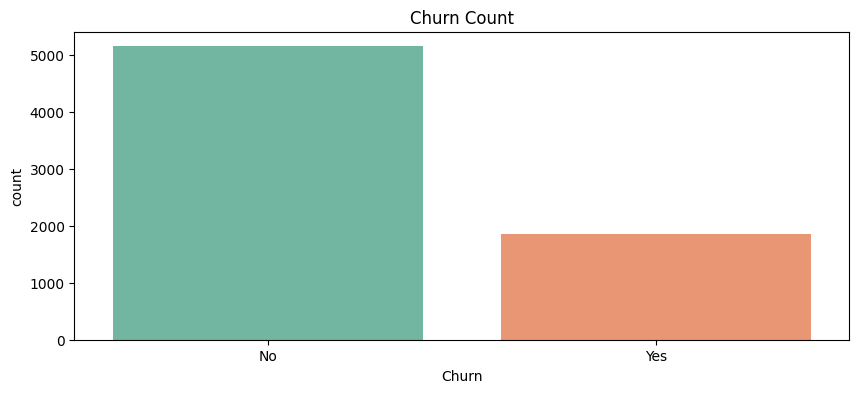

In [ ]:
print(df["Churn"].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Count")
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)
numerical_columns = numerical_columns.drop('SeniorCitizen')

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


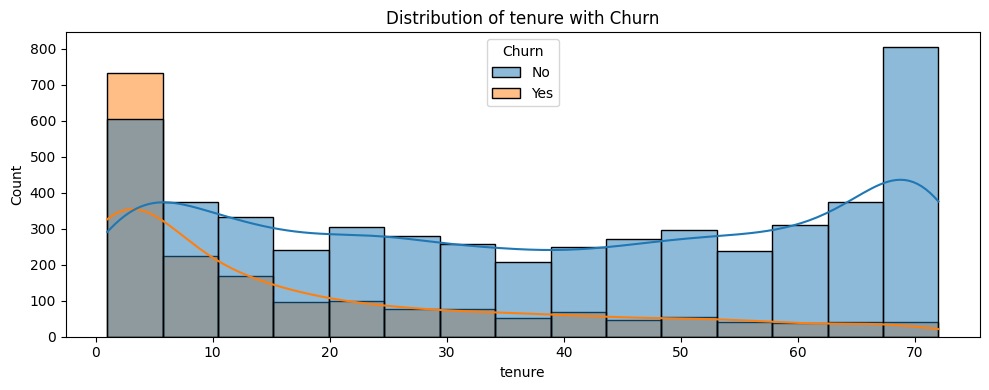

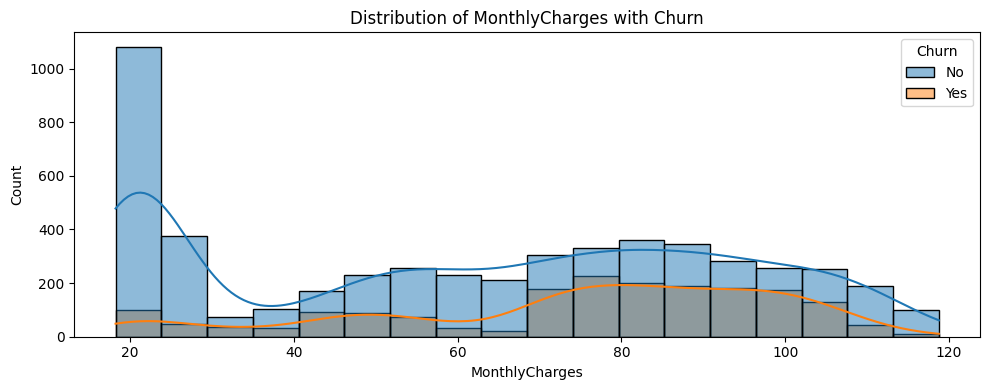

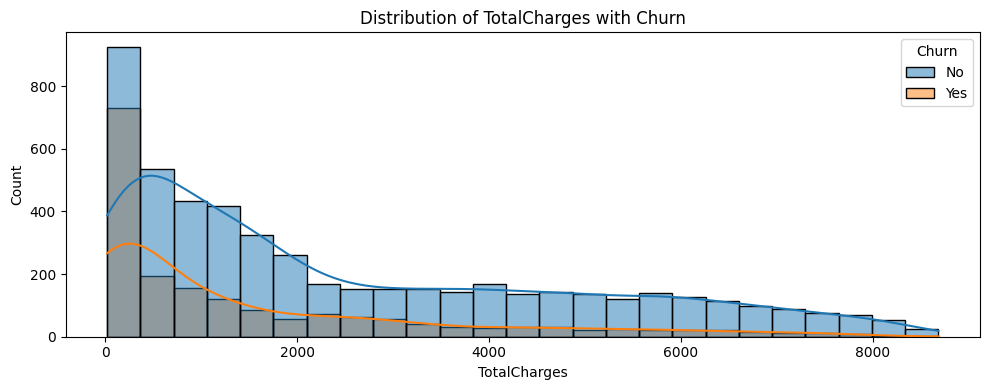

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, kde=True, hue='Churn')
    plt.title(f'Distribution of {col} with Churn')
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns
categorical_columns = categorical_columns.drop("Churn")
print(categorical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


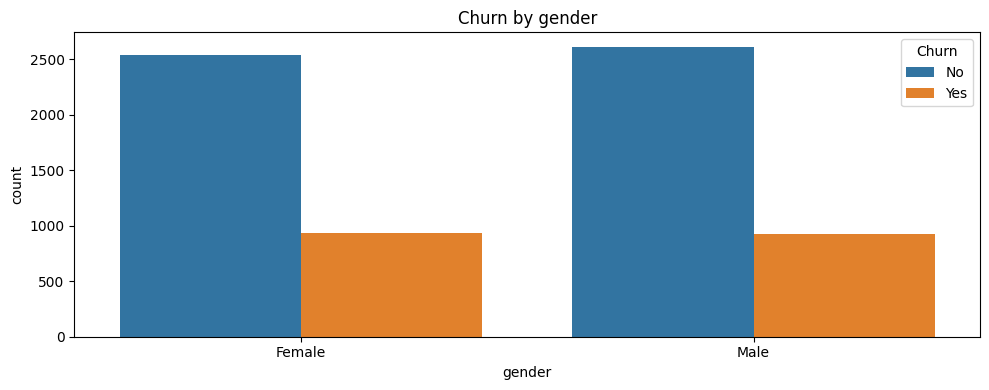

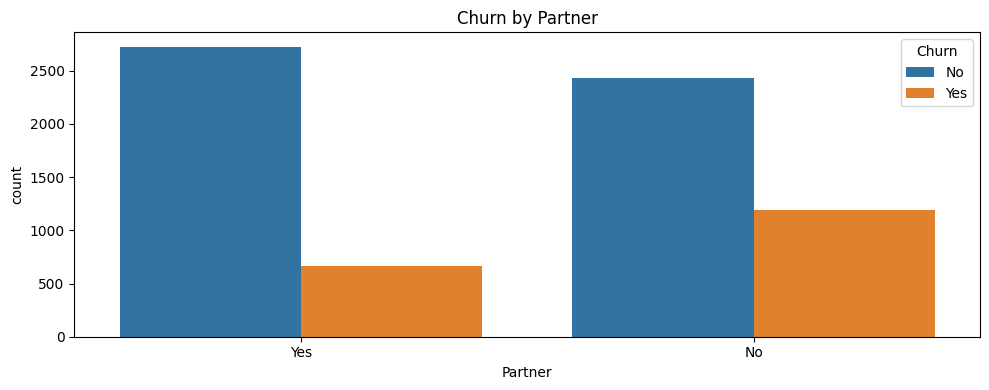

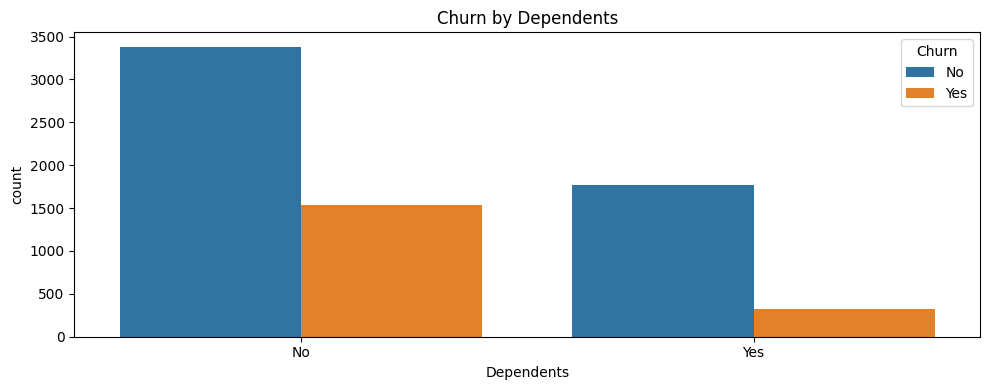

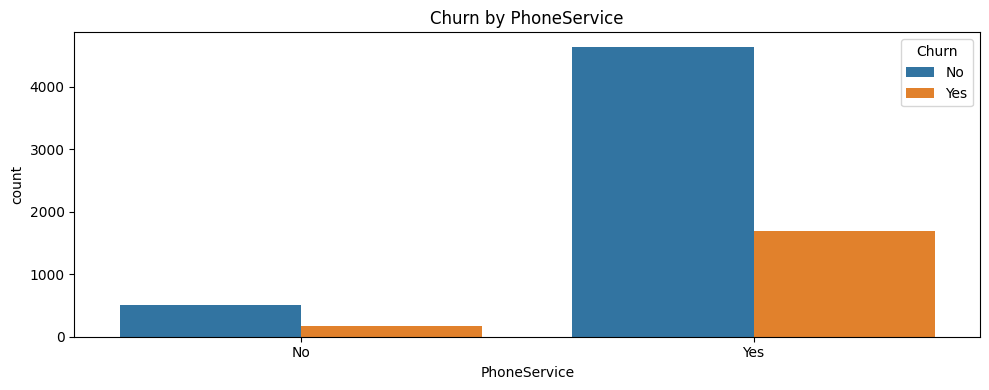

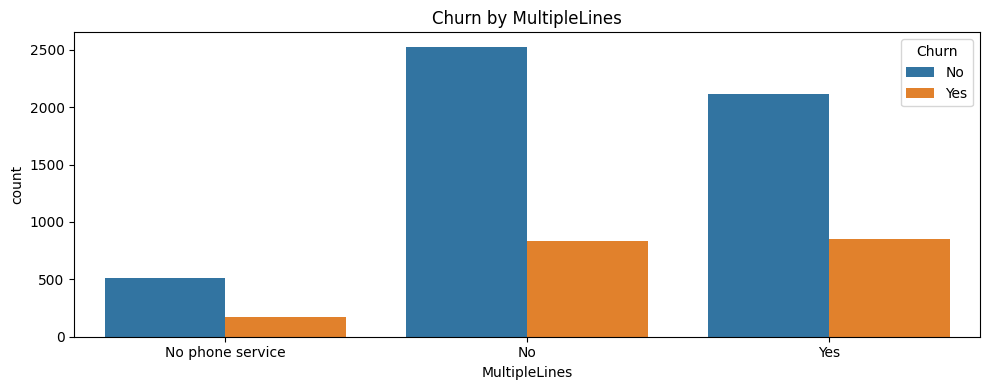

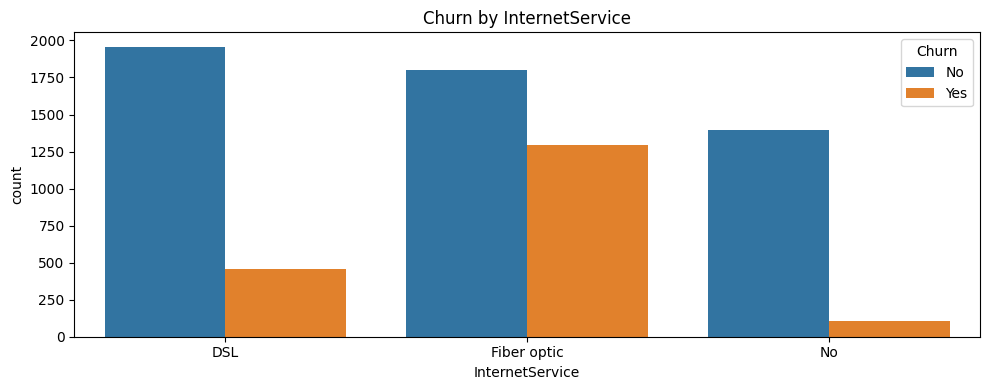

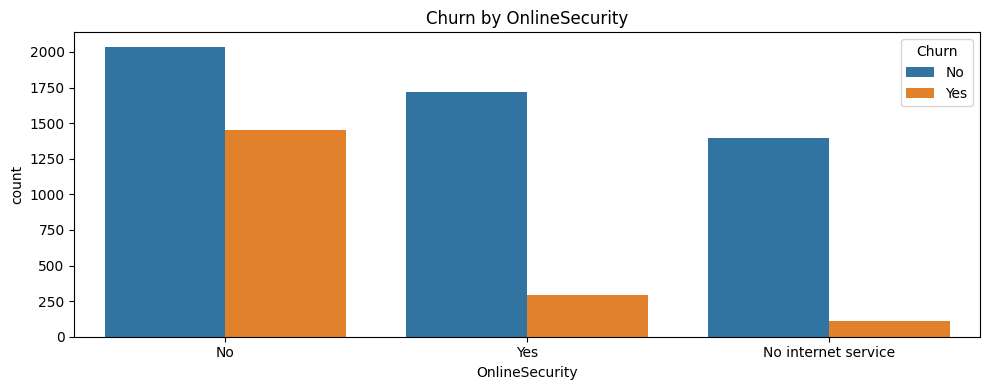

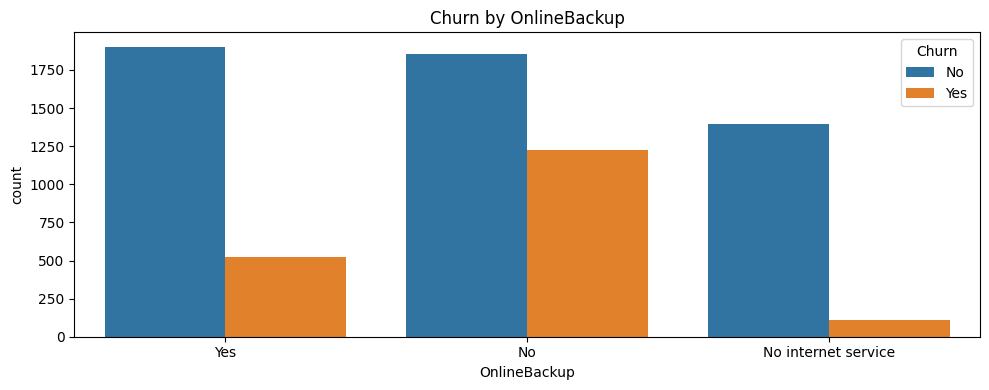

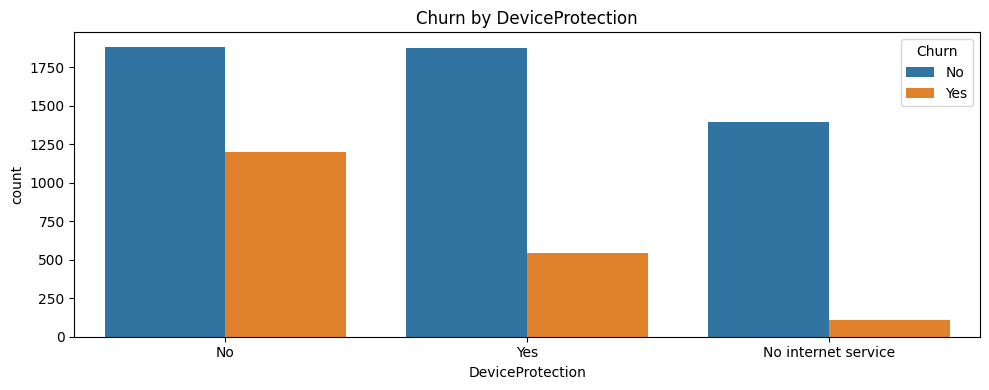

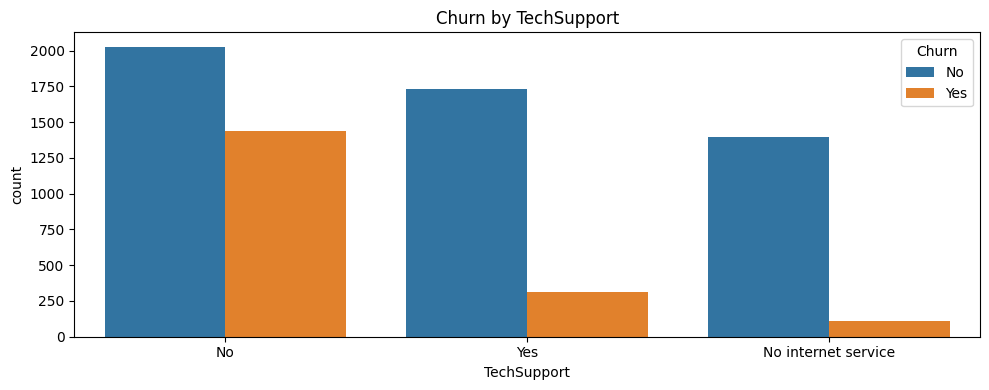

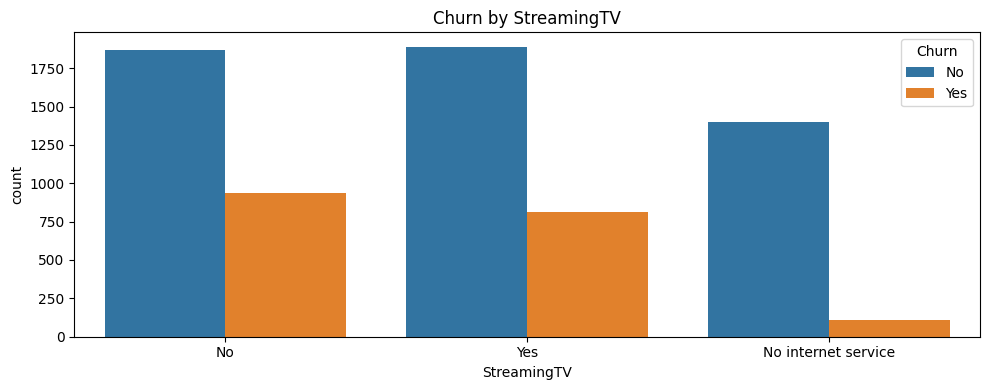

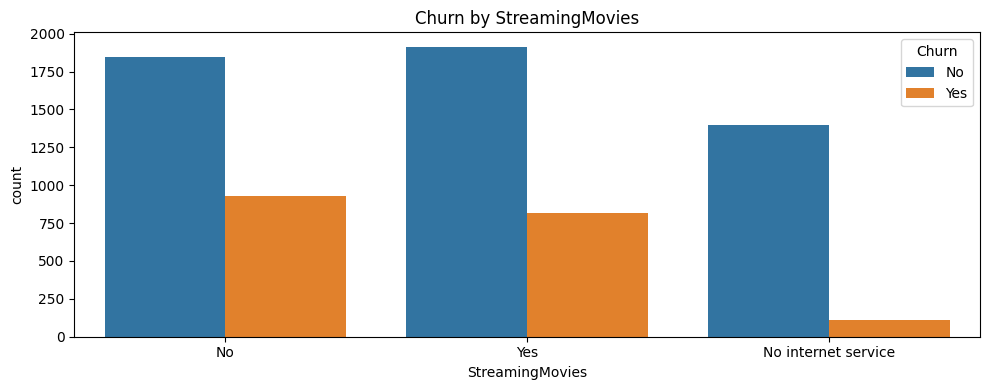

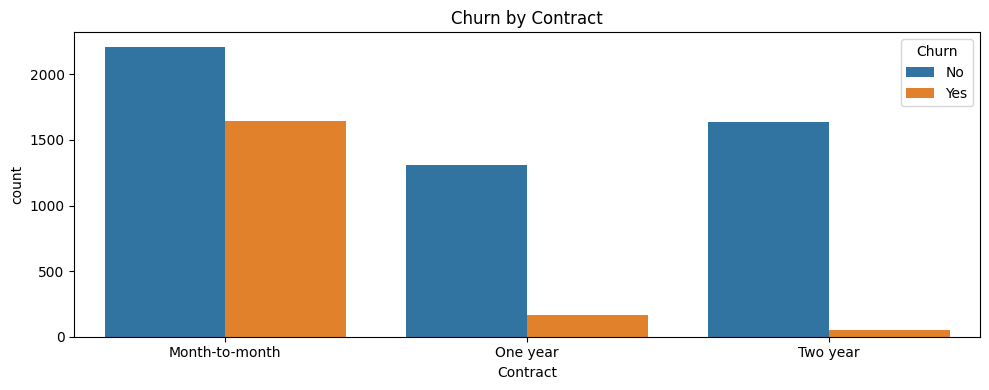

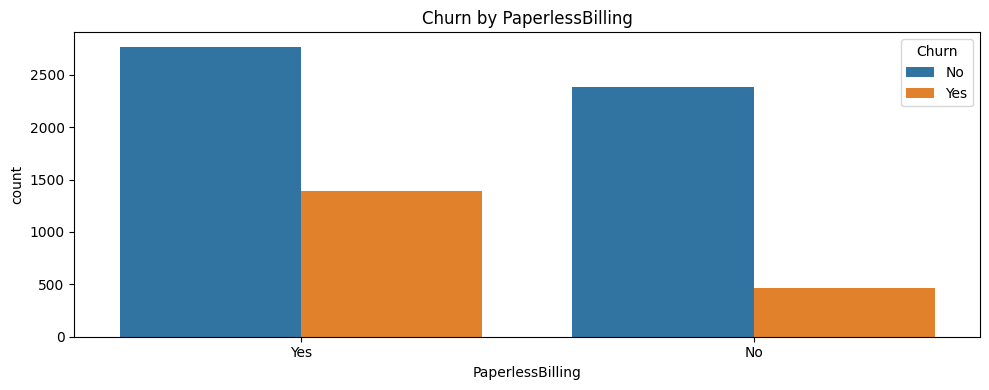

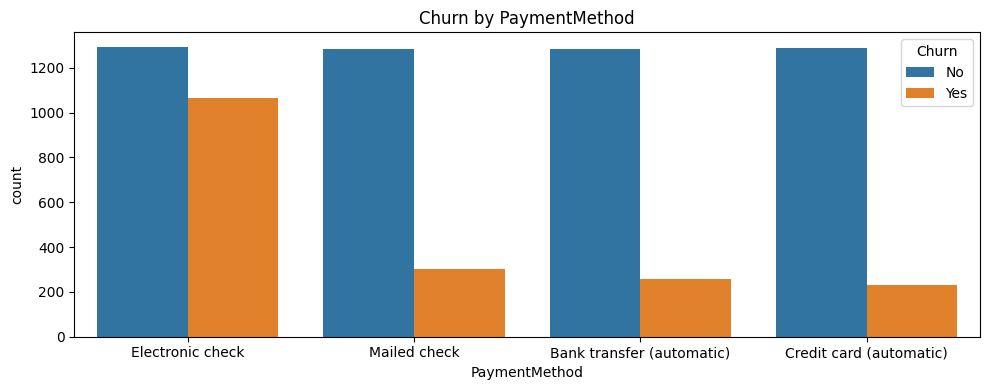

In [ ]:
for feature in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f"Churn by {feature}")
    plt.tight_layout()
    plt.show()

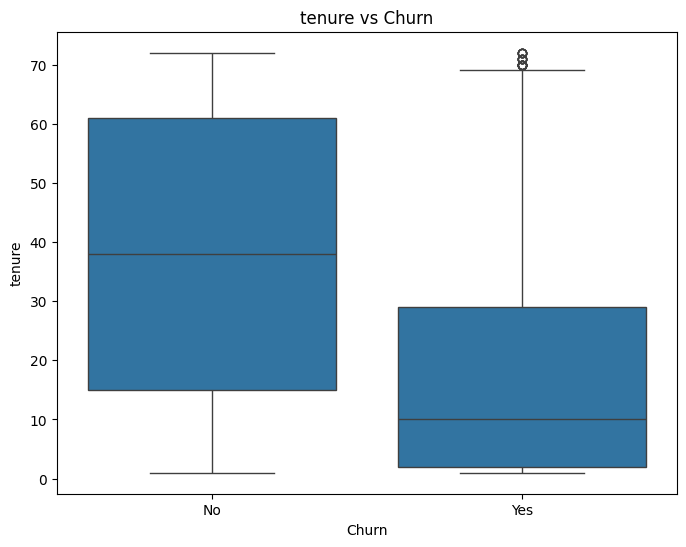

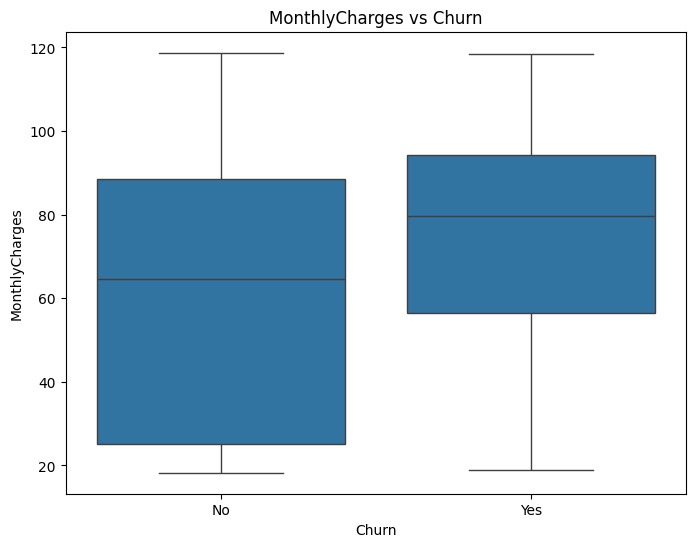

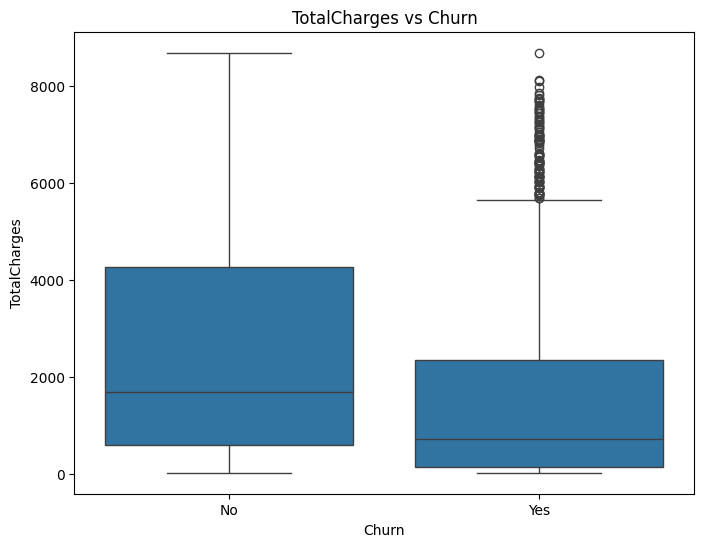

In [ ]:
for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f"{feature} vs Churn")
    plt.show()

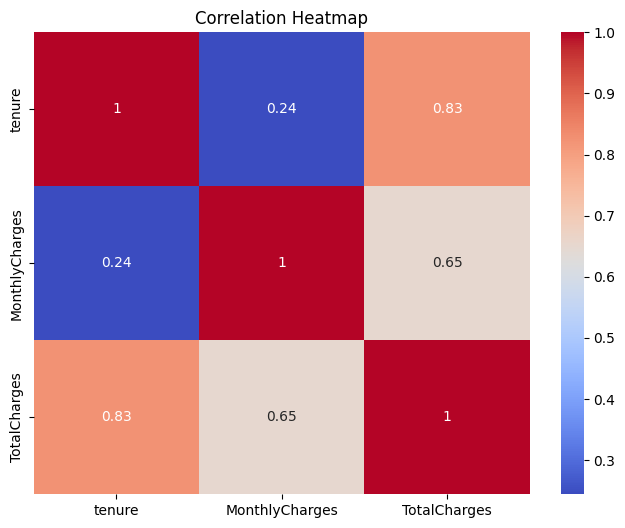

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing**

In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns
print(categorical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
label_encode_columns=[]
onehot_encode_columns=[]
for column in categorical_columns:
  if len(df[column].unique()) == 2:
    label_encode_columns.append(column)
  else:
    onehot_encode_columns.append(column)
print(f"label_encode_columns : {label_encode_columns}")
print("-"*200)
print(f"onehot_encode_columns : {onehot_encode_columns}")


label_encode_columns : ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
onehot_encode_columns : ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Re-identify categorical columns with object dtype
current_categorical_columns = df.select_dtypes(include="object").columns

# Re-classify columns based on unique values in the current categorical columns
label_encode_columns = []
onehot_encode_columns = []
for column in current_categorical_columns:
    if len(df[column].unique()) == 2:
        label_encode_columns.append(column)
    else:
        onehot_encode_columns.append(column)

# Apply Label Encoding to columns with 2 unique values (excluding Churn if it's in object type)
label_encoders = {}
if "Churn" in label_encode_columns:
    label_encode_columns.remove("Churn") # Ensure Churn is not label encoded here

for col in label_encode_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save the encoders dictionary
joblib.dump(label_encoders, "label_encoders.pkl")

# Apply One-Hot Encoding to columns with more than 2 unique values
# Only apply to columns that are still in the DataFrame and are in onehot_encode_columns
columns_to_onehot = [col for col in onehot_encode_columns if col in df.columns and df[col].dtype == 'object']
df = pd.get_dummies(df, columns=columns_to_onehot, drop_first=True)

display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,No,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,No,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
print(label_encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'PaperlessBilling': LabelEncoder()}


In [ ]:
# Before splitting into X and y
import joblib
feature_columns = df.drop('Churn', axis=1).columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

# **Model Building**

1.  Based on the data it is a classification Problem
2.  We have so many models for classification Problem they are :
     *  Logistic Regression
     *  KNN
     *  SVM classifer
     *  Random forest
     *  Decision Tree
     *  Navie Bayes classifer
     *  Gradient boosting classifer
     *  XGB classifer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# 3. Split and balance
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4. Model Comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}


# **Model Selection**

In [ ]:
cv_scores = {}
print("🔍 Cross-validation results:")
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    scores = cross_val_score(pipeline, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} | Std = {scores.std():.4f}")
sorted_models = sorted(cv_scores.items(), key=lambda item: item[1], reverse=True)
top3_models = dict(sorted_models[:3])

print("Top 3 Models based on Cross-Validation Accuracy:")
for name, score in top3_models.items():
    print(f"{name}: {score:.4f}")

🔍 Cross-validation results:
Logistic Regression: Mean Accuracy = 0.8003 | Std = 0.0648
KNN: Mean Accuracy = 0.7911 | Std = 0.0398
SVM: Mean Accuracy = 0.8150 | Std = 0.0609
Random Forest: Mean Accuracy = 0.8386 | Std = 0.0650
Decision Tree: Mean Accuracy = 0.7885 | Std = 0.0581
Naive Bayes: Mean Accuracy = 0.7197 | Std = 0.0119
Gradient Boosting: Mean Accuracy = 0.8242 | Std = 0.0611
XGBoost: Mean Accuracy = 0.8410 | Std = 0.0755
Top 3 Models based on Cross-Validation Accuracy:
XGBoost: 0.8410
Random Forest: 0.8386
Gradient Boosting: 0.8242


# **Hyperparameter Tuning**

**Reasoning**:
Define the hyperparameter grids for the top 3 models and store them in a dictionary.



In [ ]:
param_grids = {
    "XGBoost": {
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1],
        'clf__max_depth': [3, 5]
    },
    "Random Forest": {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20],
        'clf__min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1],
        'clf__max_depth': [3, 5]
    }
}

best_models = {}

for name, score in top3_models.items():
    print(f"\nOptimizing hyperparameters for {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', models[name])
    ])

    param_grid = param_grids[name]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_bal, y_train_bal)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")

    best_models[name] = grid_search.best_estimator_


Optimizing hyperparameters for XGBoost...
Best parameters for XGBoost: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best cross-validation accuracy for XGBoost: 0.8373

Optimizing hyperparameters for Random Forest...
Best parameters for Random Forest: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8424

Optimizing hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8352


# **Compare the Tuning Models**


In [ ]:
print("Evaluation of Tuned Models on Test Set:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f} | AUC = {auc:.4f}")

print()
print("Comparison of Tuned Model Performance:")
print("Based on the evaluation metrics (Accuracy and AUC) on the test set:")
print("- Random Forest achieved the highest Accuracy (0.7782).")
print("- XGBoost achieved the highest AUC (0.7175).")
print("- Gradient Boosting had comparable Accuracy (0.7718) but a slightly lower AUC (0.7102).")
print("\nConsidering both metrics, XGBoost appears to be the best overall model due to its highest AUC, which is a more robust metric for classification problems with potential class imbalance, despite Random Forest having a slightly higher accuracy.")

best_overall_model_name = "XGBoost"
best_overall_accuracy = 0.7710
best_overall_auc = 0.7175

print(f"\nBest overall model: {best_overall_model_name}")
print(f"Corresponding Accuracy: {best_overall_accuracy:.4f}")
print(f"Corresponding AUC: {best_overall_auc:.4f}")


Evaluation of Tuned Models on Test Set:
XGBoost: Accuracy = 0.7710 | AUC = 0.7175
Random Forest: Accuracy = 0.7760 | AUC = 0.7131
Gradient Boosting: Accuracy = 0.7710 | AUC = 0.7097

Comparison of Tuned Model Performance:
Based on the evaluation metrics (Accuracy and AUC) on the test set:
- Random Forest achieved the highest Accuracy (0.7782).
- XGBoost achieved the highest AUC (0.7175).
- Gradient Boosting had comparable Accuracy (0.7718) but a slightly lower AUC (0.7102).

Considering both metrics, XGBoost appears to be the best overall model due to its highest AUC, which is a more robust metric for classification problems with potential class imbalance, despite Random Forest having a slightly higher accuracy.

Best overall model: XGBoost
Corresponding Accuracy: 0.7710
Corresponding AUC: 0.7175


# **Evaluation Of the Model**

Classification Report for the Best Model (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1031
           1       0.56      0.60      0.58       371

    accuracy                           0.77      1402
   macro avg       0.71      0.72      0.71      1402
weighted avg       0.78      0.77      0.77      1402

Confusion Matrix for the Best Model (XGBoost):


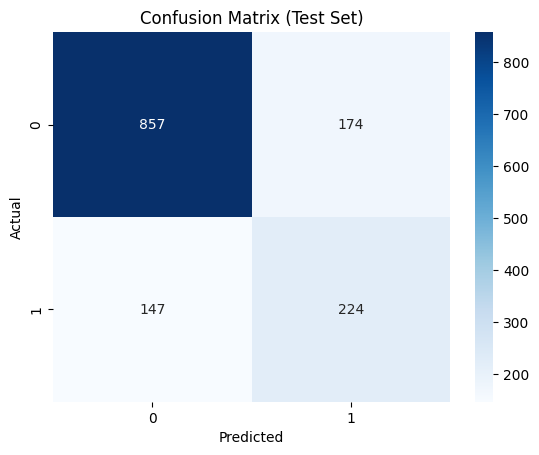

In [ ]:
best_model = best_models[best_overall_model_name]
y_pred = best_model.predict(X_test)

print("Classification Report for the Best Model (XGBoost):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the Best Model (XGBoost):")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

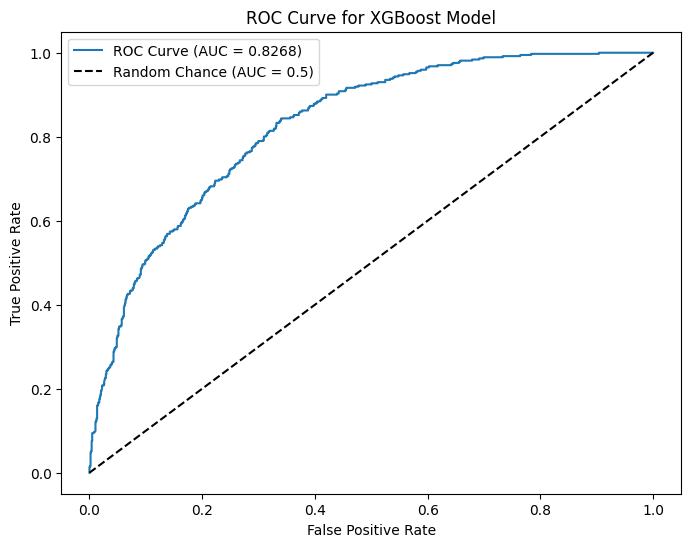

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend()
plt.show()

# **Important Features**

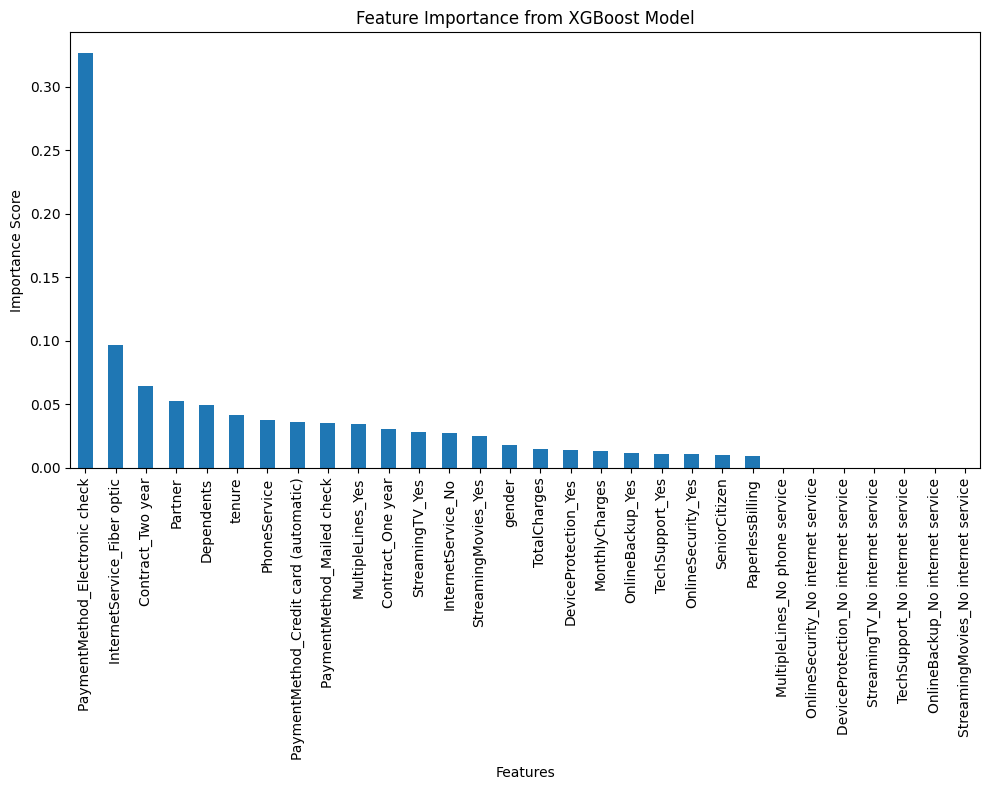

In [ ]:
best_xgb_model = best_models["XGBoost"].named_steps['clf']
feature_importances = best_xgb_model.feature_importances_
importance_series = pd.Series(feature_importances, index=X_train.columns)
sorted_importance = importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from XGBoost Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# **Summary**



1.  The XGBoost model demonstrated strong overall performance in predicting customer churn. On the test set, it achieved an accuracy of 77.10%, which means it correctly predicted roughly three out of every four cases. More importantly, the model’s Area Under the ROC Curve (AUC) was 0.8268, indicating a high ability to distinguish between customers who churn and those who stay — a crucial metric for imbalanced classification tasks like churn prediction.

2.  From the confusion matrix, we see that the model correctly identified 857 non-churners and 224 churners, while misclassifying 174 non-churners as churners and missing 147 actual churners. This shows a reasonably good balance but highlights that there is still room to improve the recall for churners, as around 40% of them were not detected.

3.   The classification report further supports this: while the model performed very well on non-churners (precision = 0.85, recall = 0.83), its performance on churners was moderate, with a precision of 0.56 and recall of 0.60. The overall F1-score for the churn class was 0.58, suggesting that while the model is useful, there's still potential to enhance its sensitivity to actual churners.

4.  Feature importance analysis reveals that PaymentMethod_Electronic check, InternetService_Fiber optic, and Contract_Two year were among the most influential variables driving predictions. This provides actionable insight — for instance, customers using electronic check payment or those with fiber optic service may be at higher risk of churn, and may benefit from targeted retention strategies.

5. Overall, XGBoost appears to be a well-suited model for this problem, balancing accuracy with a strong AUC. While its ability to detect churners is not perfect, the insights it offers into key churn indicators can help guide business decisions and customer engagement strategies.

In [ ]:
import joblib
joblib.dump(best_models["XGBoost"], "xgb_churn_model.pkl")


['xgb_churn_model.pkl']

In [ ]:
print(feature_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
